# (clustering)k-means 알고리즘으로 붓꽃 품종 구분하기

In [356]:
import pandas as pd

In [357]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris() 
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


iris.data ?

In [358]:
from sklearn.cluster import KMeans

In [359]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [360]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

###  실루엣 : 각 군집 간의 거리
여러 k값에서의 평균 실루엣 계수를 계산하여 가장 높은 값을 선택

In [361]:
from sklearn.metrics import  silhouette_score, silhouette_samples
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouet_coeff'] = score_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouet_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [362]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195919)

### 실루엣 차트

In [363]:
import matplotlib.pyplot as plt

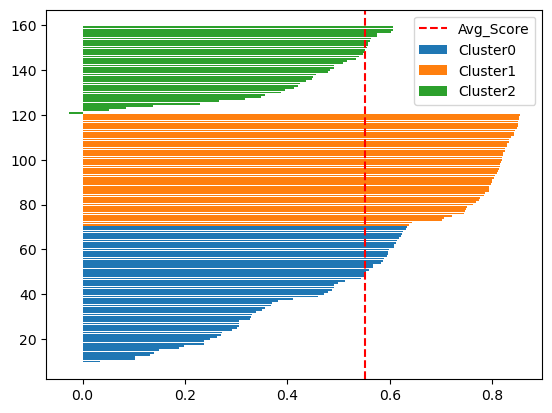

In [364]:
y_lower = 10
for i in range(3):
    cluster_i = score_samples[iris_df['cluster'] == i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
    y_lower = y_upper

# 평균 실루엣 스코어 계산 및 선 표시
avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg_Score')

# 범례 추가
plt.legend(loc='upper right')
plt.show()


엘로우 기법 - 스크리 차트
x축에 클러스터 개수, y축에 SSE 값을 표시한 스크리 차트를 생성하여, 기울기가 완만해지는 부분(팔꿈치)에 해당하는 클러스터 개수를 선택하는 방법

In [365]:
KM.inertia_

78.85566582597728

In [366]:
scree_df = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

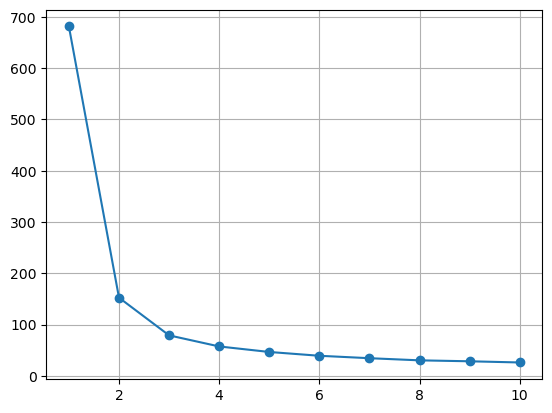

In [367]:
inertia = []
k_values =range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

# PCA
차원축소 > 특성추출

In [368]:
from sklearn.decomposition import PCA

# PCA 객체 생성 (주성분 2개로 축소)
pca = PCA(n_components=2)

# 데이터 변환
pca_transformed = pca.fit_transform(iris.data)

pca_transformed.shape

(150, 2)

In [369]:
# 설명된 분산 비율 확인
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [370]:
iris_df['pca_x'] = pca_transformed[:,0] # PC1
iris_df['pca_y'] = pca_transformed[:,1] # PC2
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouet_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


## PCA 결과 시각화

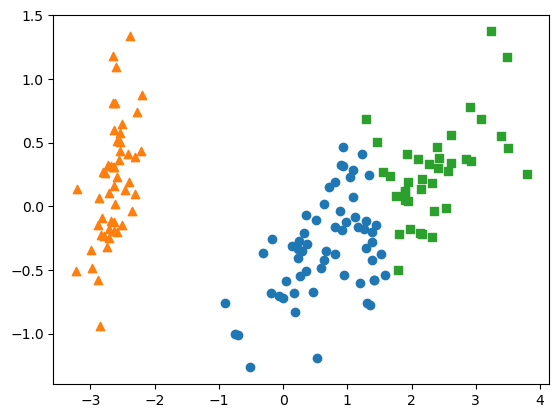

In [371]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='^')

plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='s')

plt.show()

## 스케일링 
- StandardScaler로 스케일링
- PCA 2개로 축소
- 시각화

In [372]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:4])
iris_caled[:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

In [373]:
from sklearn.decomposition import PCA
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouet_coeff,pca_x,pca_y,pca_scaled_x,pca_scaled_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755,-2.389842,0.646835


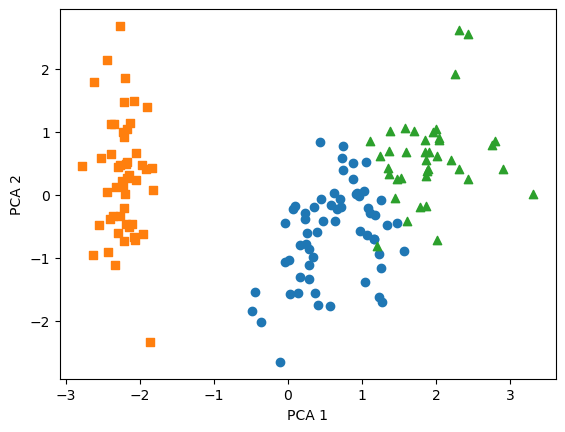

In [374]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [375]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [376]:
pca_scaled.explained_variance_ratio_

array([0.72962445, 0.22850762])

# 클러스터링 실습

In [377]:
from sklearn.datasets import load_breast_cancer

In [378]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [379]:
KM = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
KM.fit(data_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [380]:
KM_scaled = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
KM_scaled.fit(scaled_data_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [381]:
data_df['target'] = cancer.target
data_df['cluster'] = KM.labels_
data_df.groupby(['target', 'cluster']).count()

mean radius  mean texture  mean perimeter  mean area  \
target cluster                                                         
0      0                 15            15              15         15   
       1                 87            87              87         87   
       2                 94            94              94         94   
       3                 16            16              16         16   
1      0                305           305             305        305   
       2                 52            52              52         52   

                mean smoothness  mean compactness  mean concavity  \
target cluster                                                      
0      0                     15                15              15   
       1                     87                87              87   
       2                     94                94              94   
       3                     16                16              16   
1      0                    305               305             305   
       2                     52                52              52   

                mean concave points  mean symmetry  mean fractal dimension  \
target cluster                                                               
0      0                         15             15                      15   
       1                         87             87                      87   
       2                         94             94                      94   
       3                         16             16                      16   
1      0                        305            305                     305   
       2                         52             52                      52   

                ...  worst radius  worst texture  worst perimeter  worst area  \
target cluster  ...                                                             
0      0        ...            15             15               15          15   
       1        ...            87             87               87          87   
       2        ...            94             94               94          94   
       3        ...            16             16               16          16   
1      0        ...           305            305              305         305   
       2        ...            52             52               52          52   

                worst smoothness  worst compactness  worst concavity  \
target cluster                                                         
0      0                      15                 15               15   
       1                      87                 87               87   
       2                      94                 94               94   
       3                      16                 16               16   
1      0                     305                305              305   
       2                      52                 52               52   

                worst concave points  worst symmetry  worst fractal dimension  
target cluster                                                                 
0      0                          15              15                       15  
       1                          87              87                       87  
       2                          94              94                       94  
       3                          16              16                       16  
1      0                         305             305                      305  
       2                          52              52                       52  

[6 rows x 30 columns]

In [382]:
from sklearn.metrics import  silhouette_score, silhouette_samples
score_samples = silhouette_samples(cancer.data, data_df['cluster'])
data_df['silhouet_coeff'] = score_samples
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,silhouet_coeff
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1,0.591973
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1,0.646314
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1,0.705449
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,0.699832
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1,0.630597


In [383]:
silhouette_score(cancer.data, data_df['cluster'])

np.float64(0.5438593733346516)

In [384]:
scree_df = data_df.iloc[:, :-3]

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

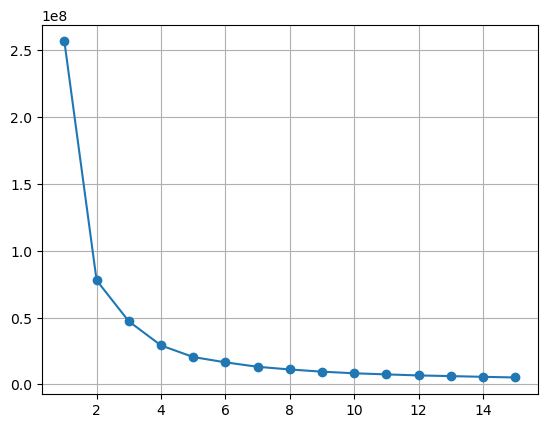

In [385]:
inertia = []
k_values =range(1,16)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

PCA 4개

스케일러 객체 생성

In [386]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# data_df의 뒤에서 3개 컬럼을 제외한 부분만 스케일링
scaled_features = scaler.fit_transform(data_df.iloc[:, :-3])

# 스케일링된 부분과 제외한 원본 부분을 합치기
scaled_data_df = pd.concat(
    [pd.DataFrame(scaled_features, columns=data_df.columns[:-3]),
     data_df.iloc[:, -3:].reset_index(drop=True)],
    axis=1
)

# 확인
scaled_data_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,silhouet_coeff
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0,1,0.591973
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0,1,0.646314
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0,1,0.705449
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0,0,0.699832
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0,1,0.630597


In [387]:
import numpy as np

In [393]:
from sklearn.decomposition import PCA

# PCA 객체 생성 (주성분 4개로 축소)
pca = PCA(n_components=4)

# 데이터 변환
pca_transformed = pca.fit_transform(cancer.data)

# 설명된 분산 비율 확인
print(f'분산 비율 확인 : {pca.explained_variance_ratio_}')

분산 비율 확인 : [1. 0. 0. 0.]


In [389]:
data_df['pca_1'] = pca_transformed[:,0] # PC1
data_df['pca_2'] = pca_transformed[:,1] # PC2
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,silhouet_coeff,pca_1,pca_2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,0,1,0.591973,1160.142574,-293.917544
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,0,1,0.646314,1269.122443,15.630182
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,0,1,0.705449,995.793889,39.156743
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,0.699832,-407.180803,-67.380320
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.2050,0.4000,0.1625,0.2364,0.07678,0,1,0.630597,930.341180,189.340742


In [390]:
scaled_data_df['pca_x'] = pca_transformed[:,0] # PC1
scaled_data_df['pca_y'] = pca_transformed[:,1] # PC2
scaled_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,silhouet_coeff,pca_x,pca_y
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.616665,2.109526,2.296076,2.750622,1.937015,0,1,0.591973,1160.142574,-293.917544
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0,1,0.646314,1269.122443,15.630182
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.082932,0.854974,1.955000,1.152255,0.201391,0,1,0.705449,995.793889,39.156743
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,3.893397,1.989588,2.175786,6.046041,4.935010,0,0,0.699832,-407.180803,-67.380320
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0,1,0.630597,930.341180,189.340742


In [391]:
data_df['cluster'].unique()

array([1, 0, 2, 3], dtype=int32)

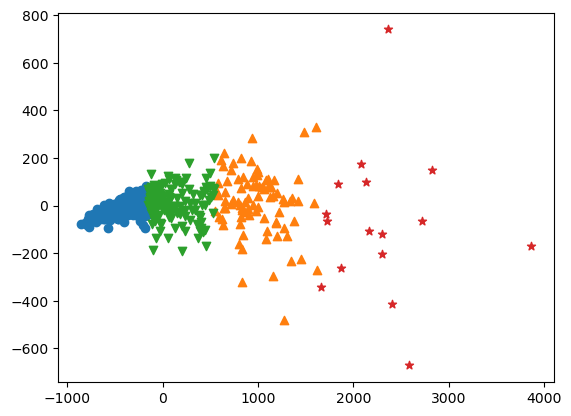

In [394]:
plt.scatter(x=data_df.loc[data_df['cluster'] == 0, 'pca_1'],
            y=data_df.loc[data_df['cluster'] == 0, 'pca_2'], marker='o')

plt.scatter(x=data_df.loc[data_df['cluster'] == 1, 'pca_1'],
            y=data_df.loc[data_df['cluster'] == 1, 'pca_2'], marker='^')

plt.scatter(x=data_df.loc[data_df['cluster'] == 2, 'pca_1'],
            y=data_df.loc[data_df['cluster'] == 2, 'pca_2'], marker='v')

plt.scatter(x=data_df.loc[data_df['cluster'] == 3, 'pca_1'],
            y=data_df.loc[data_df['cluster'] == 3, 'pca_2'], marker='*')

plt.show()

스케일링 된 데이터

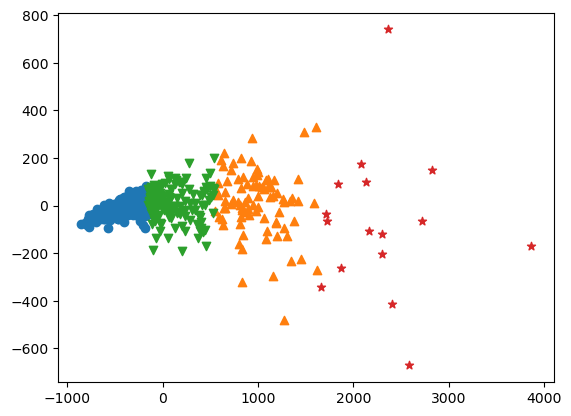

In [ ]:
plt.scatter(x=scaled_data_df.loc[scaled_data_df['cluster'] == 0, 'pca_x'],
            y=scaled_data_df.loc[scaled_data_df['cluster'] == 0, 'pca_y'], marker='o')

plt.scatter(x=scaled_data_df.loc[scaled_data_df['cluster'] == 1, 'pca_x'],
            y=scaled_data_df.loc[scaled_data_df['cluster'] == 1, 'pca_y'], marker='^')

plt.scatter(x=scaled_data_df.loc[scaled_data_df['cluster'] == 2, 'pca_x'],
            y=scaled_data_df.loc[scaled_data_df['cluster'] == 2, 'pca_y'], marker='v')

plt.scatter(x=scaled_data_df.loc[scaled_data_df['cluster'] == 3, 'pca_x'],
            y=scaled_data_df.loc[scaled_data_df['cluster'] == 3, 'pca_y'], marker='*')

plt.show()

In [ ]:
# pca 2개의 주성분, ... 그 이상 주성분 추출
# explained_variance_ratio_ 가장 높은 주성분의 갯수
# kmeans data = pca1, pca2, cluster = 2